In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import random
import IPython.display as ipd

In [2]:
train_df = pd.read_csv('data/Train.csv')

In [3]:
train_df.head()

Word_id Swahili_word English_translation
0  id_v8rz06e6rv31.wav        mbili                 two
1  id_vmbwicdpfn68.wav         tatu               three
2  id_injlouhxg1hg.wav         ndio                 yes
3  id_gdq23p6xgzya.wav          nne                four
4  id_lpstklz51zpz.wav         nane               eight

In [4]:
train_df['Swahili_word'].value_counts()
# perfectly balanced

mbili     350
tatu      350
ndio      350
nne       350
nane      350
hapana    350
sita      350
tisa      350
moja      350
saba      350
tano      350
kumi      350
Name: Swahili_word, dtype: int64

In [9]:
# Sample some words
for word in random.sample(train_df['Swahili_word'].unique().tolist(), 6):
    sample = train_df[train_df['Swahili_word'] == word]['Word_id'].sample(1).values[0]
    display(word, sample, ipd.Audio('data/Swahili_words/'+ sample ))

'moja'

'id_9sw4vjd4i5pf.wav'

'nane'

'id_kd6i4g770kdy.wav'

'tisa'

'id_aagtkxubkqpf.wav'

'ndio'

'id_kt0smtnltto1.wav'

'tatu'

'id_fnwq0rai52go.wav'

'tano'

'id_qlil9t1q7x9r.wav'

In [44]:
dict_samples=dict()
for word in train_df['Swahili_word'].unique().tolist():
    sample = train_df[train_df['Swahili_word'] == word]['Word_id'].sample(3).values[:]
    dict_samples[word] = sample

In [67]:
dict_samples

{'mbili': array(['id_79f6o7fw3qg6.wav', 'id_7t9x52klwwnk.wav',
        'id_57izdga8m2xx.wav'], dtype=object),
 'tatu': array(['id_p0w83k2cxaq7.wav', 'id_6uzw3xtmxl51.wav',
        'id_bmrbdqm6h5bh.wav'], dtype=object),
 'ndio': array(['id_azb266350h50.wav', 'id_js3zqqy5ly15.wav',
        'id_j6dlsx3s0fuv.wav'], dtype=object),
 'nne': array(['id_g7up2a6v5cwi.wav', 'id_orzfctzqm2zi.wav',
        'id_vo9nfsx311w2.wav'], dtype=object),
 'nane': array(['id_8asieqiabxry.wav', 'id_41xea6fn8t1c.wav',
        'id_uq7fd55jmric.wav'], dtype=object),
 'hapana': array(['id_2pkkuc9wjxx1.wav', 'id_1hoz655dyxuo.wav',
        'id_6imavdniztys.wav'], dtype=object),
 'sita': array(['id_da8mlgoov70o.wav', 'id_5vt34u7zlel3.wav',
        'id_y5e78yfphuaq.wav'], dtype=object),
 'tisa': array(['id_yuj86p797hh5.wav', 'id_g3ur6kbf4u3o.wav',
        'id_rl6c1vmp6wqa.wav'], dtype=object),
 'moja': array(['id_4v4m9q50zgne.wav', 'id_c0vmrggsjhfr.wav',
        'id_9an73fv3g83d.wav'], dtype=object),
 'saba': array(['

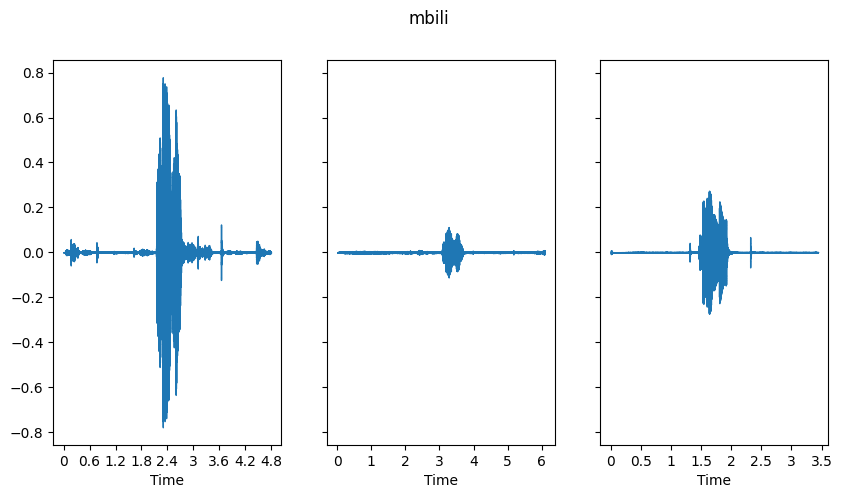

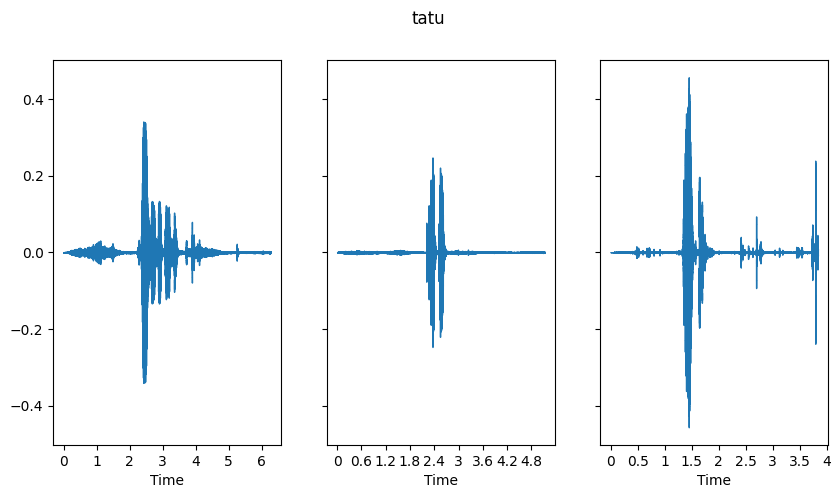

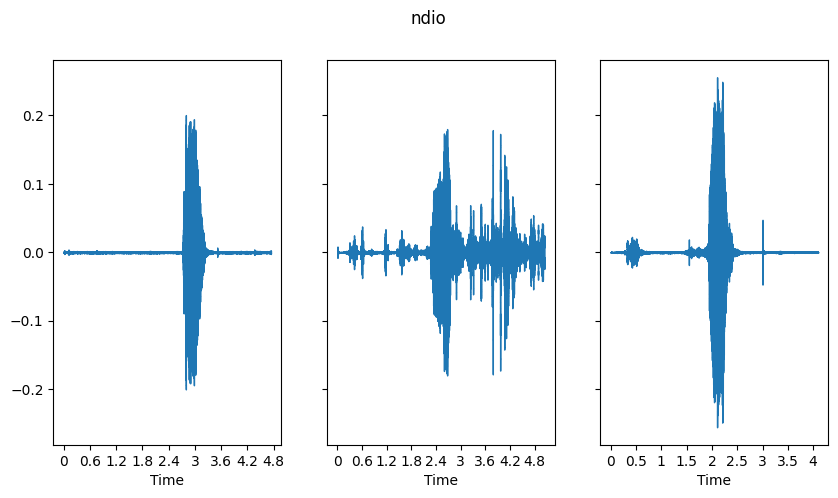

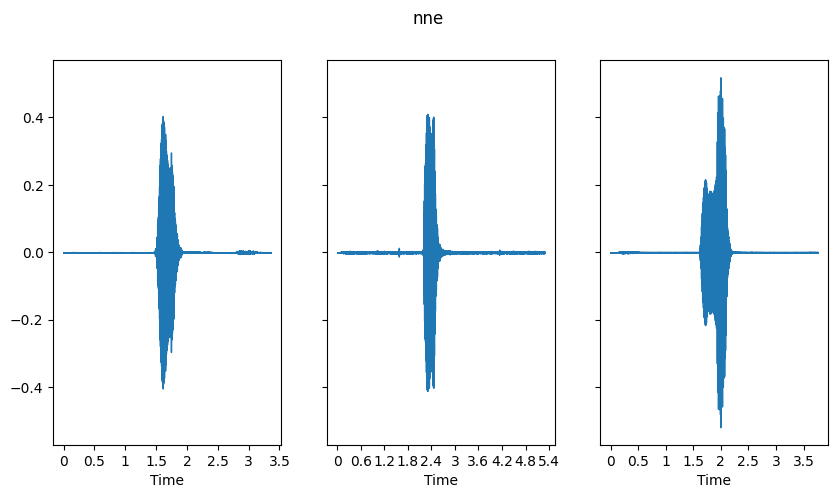

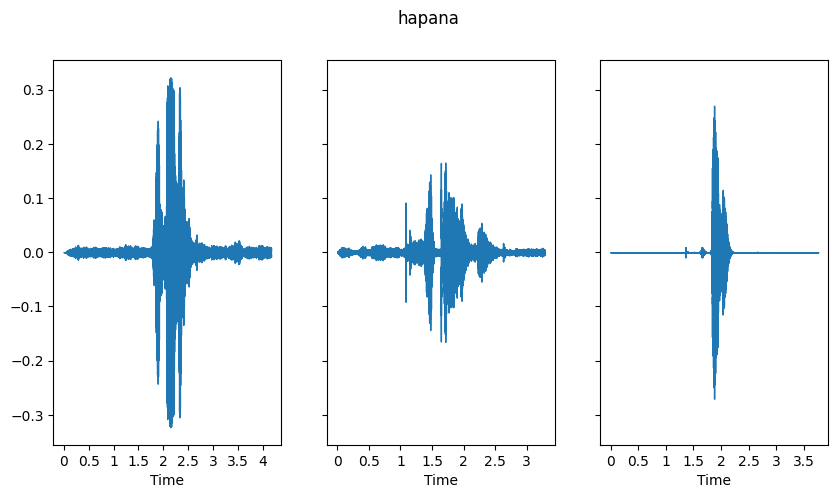

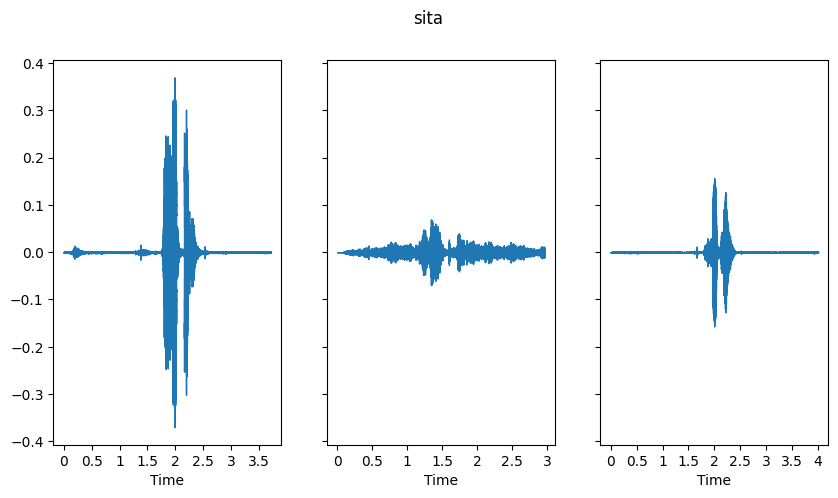

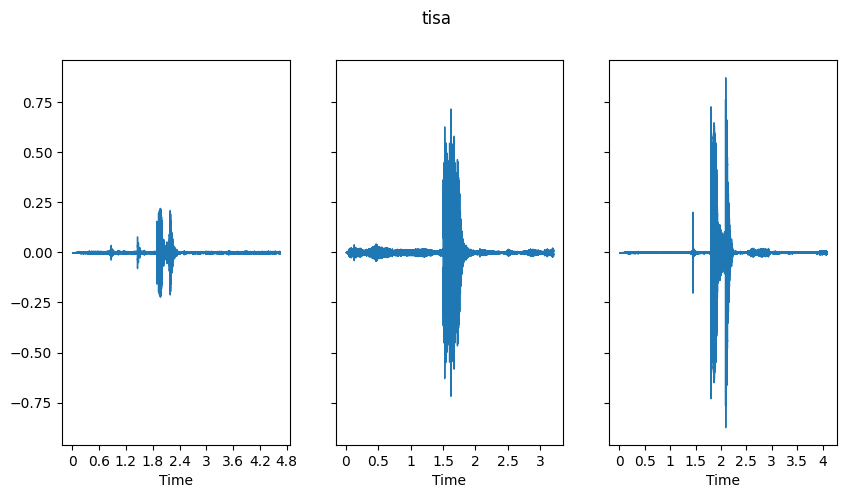

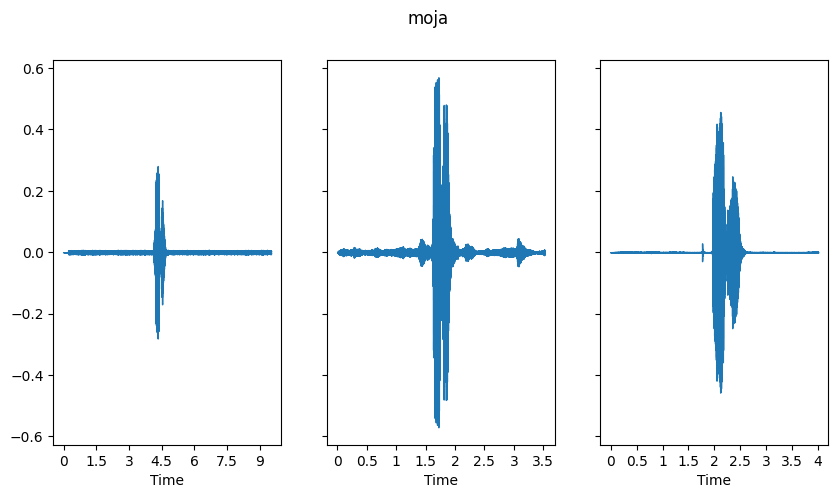

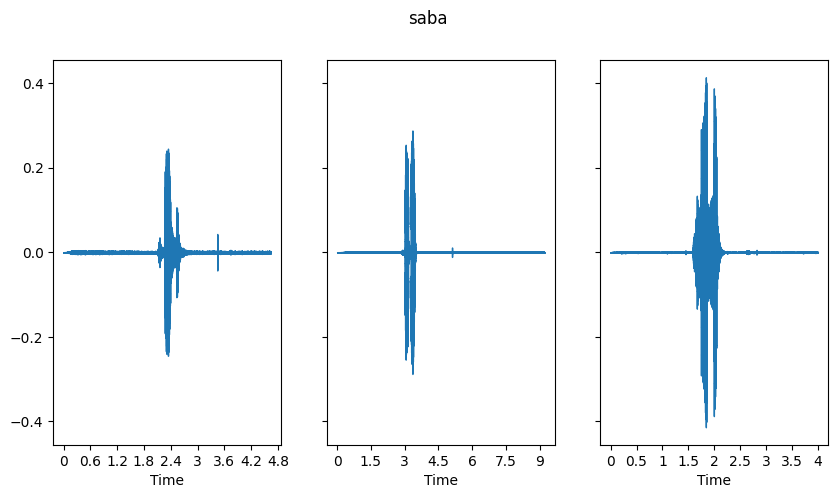

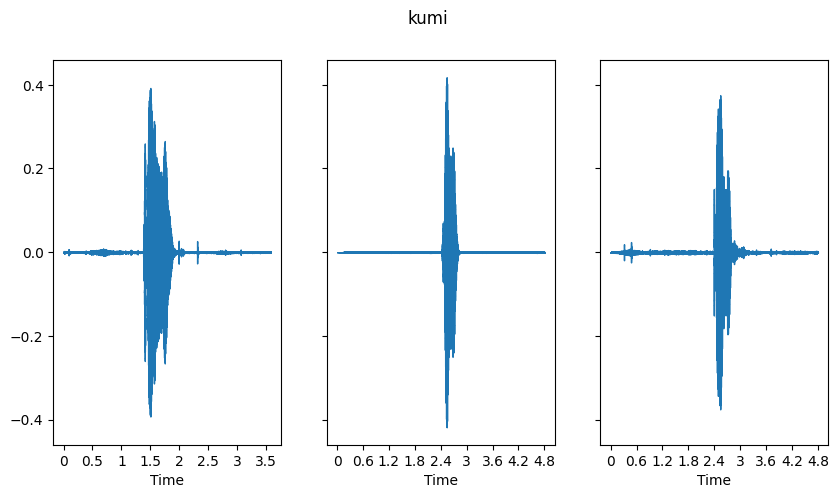

In [70]:
# show three wavefiles for all words in time domain, for easy comparison between the words
for word in dict_samples:
    i=0
    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
    fig.set_size_inches(10, 5)
    fig.suptitle(word)
    for audiofile in dict_samples[word]:
        x, sr = librosa.load('data/Swahili_words/'+audiofile)
        img = librosa.display.waveshow(x, sr=sr, ax=ax[i])
        i+=1


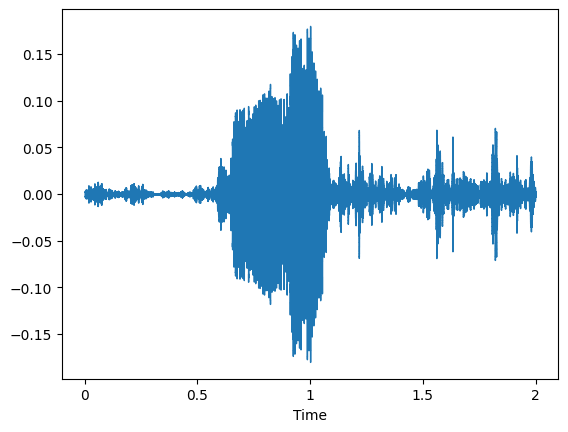

In [83]:
# filter out irrelevant silence in the wave-files by centering around the spoken words with +- 1 second.
x, sr = librosa.load('data/Swahili_words/id_js3zqqy5ly15.wav')
#assuming the talking is the loudest part of the audio signal, the wavefiles are centered around the maximum +-1sec. 
ind_max = x.argmax()
x_2sec = x[ind_max-sr:ind_max+sr]
img = librosa.display.waveshow(x_2sec, sr=sr)

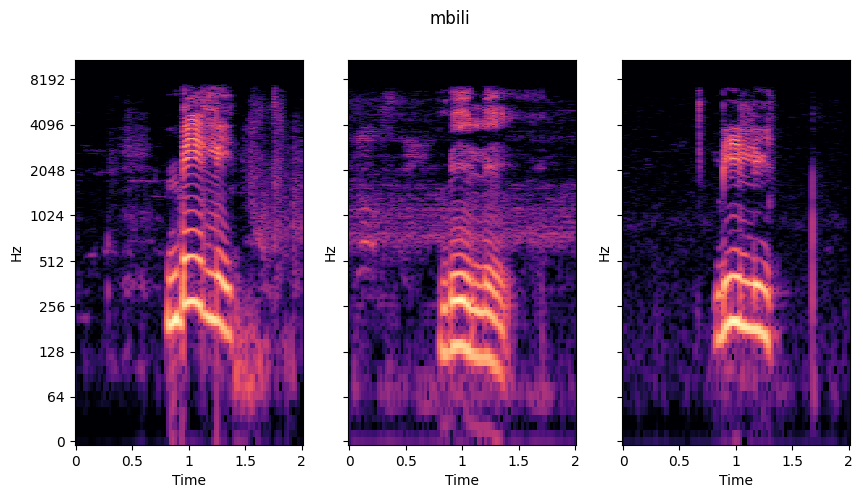

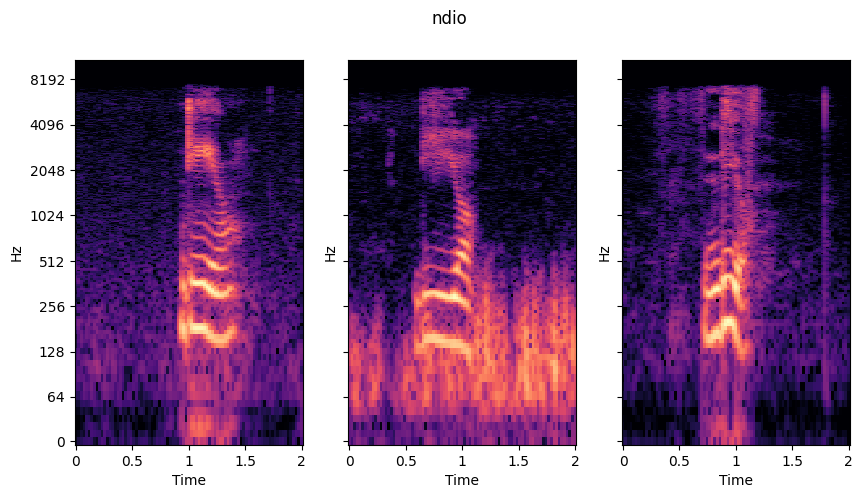

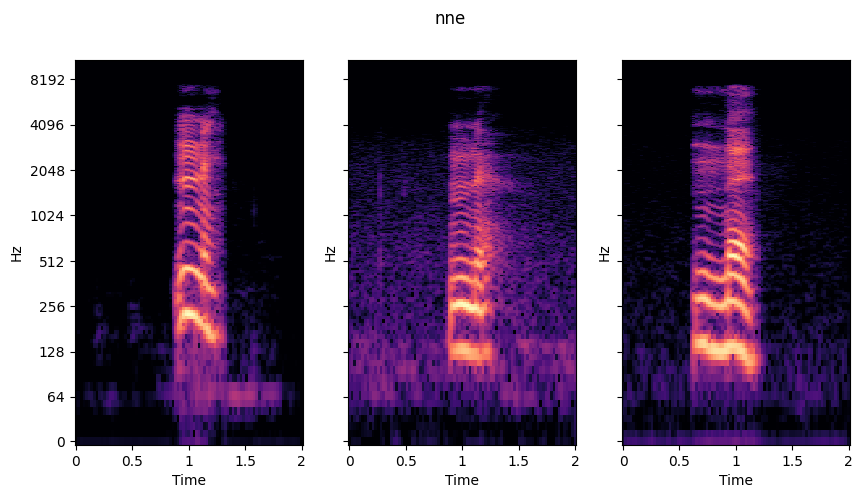

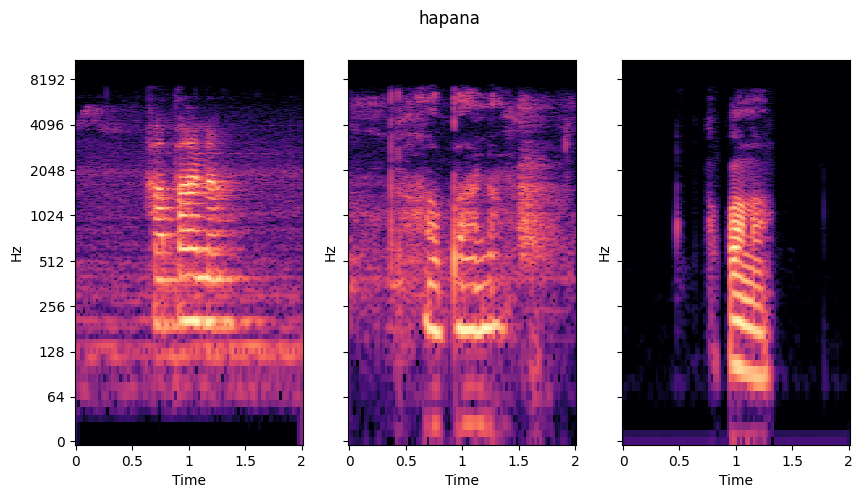

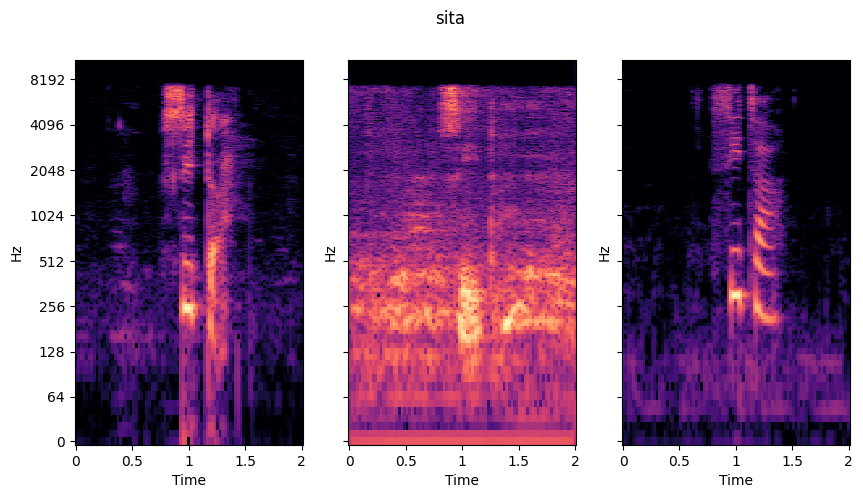

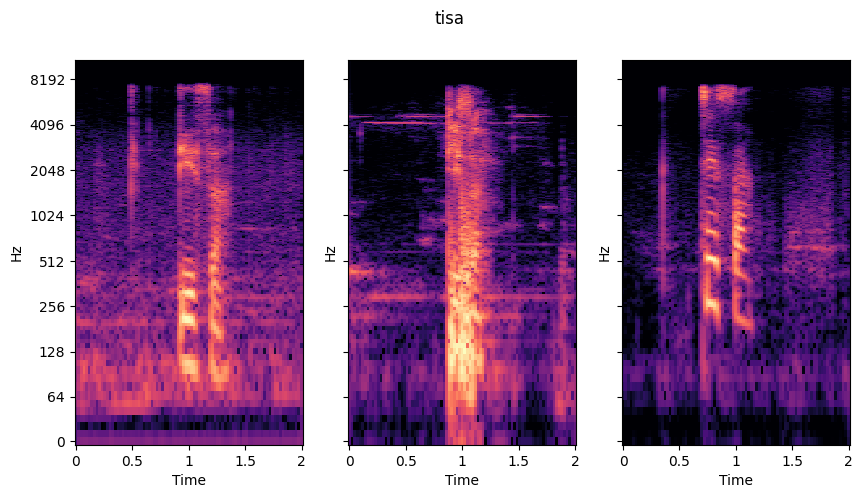

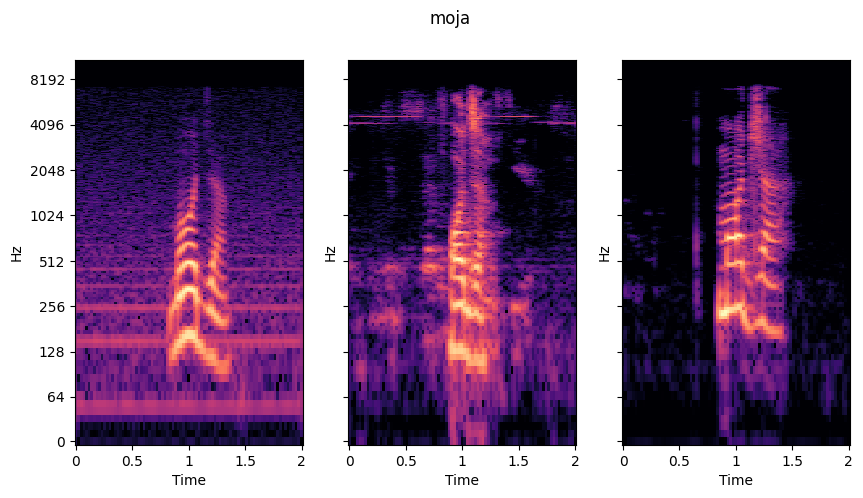

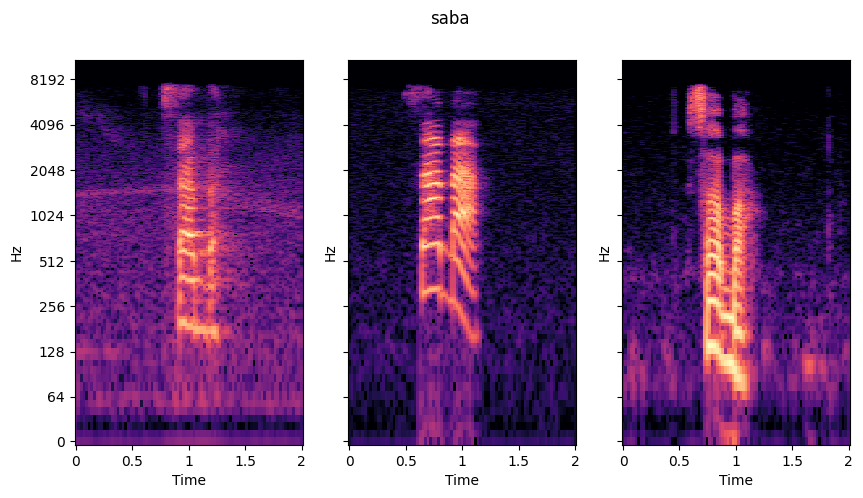

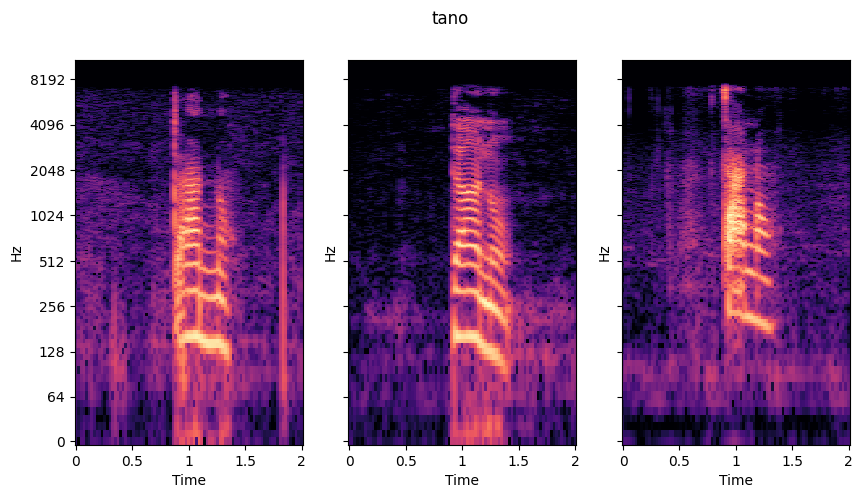

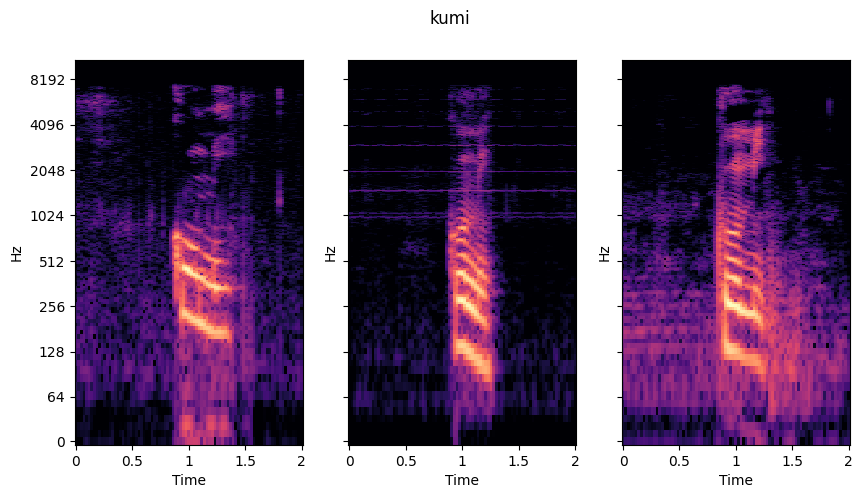

In [86]:
# show the three files of each word time-centered in frequency domain
for word in dict_samples:
    i=0
    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
    fig.set_size_inches(10, 5)
    fig.suptitle(word)
    for audiofile in dict_samples[word]:
        x, sr = librosa.load('data/Swahili_words/'+audiofile)
        # filtering +-1sec around the loudest part, centering the wavefiles to spoken word 
        ind_max = x.argmax()
        x_2sec = x[ind_max-sr:ind_max+sr]
        X = librosa.amplitude_to_db(np.abs(librosa.stft(x_2sec)), ref=np.max)
        img = librosa.display.specshow(X, y_axis='log', x_axis='time', sr=sr, ax=ax[i])
        # # finding the spectral centroid at each timestep
        # cent = librosa.feature.spectral_centroid(y=x_2sec, sr=sr)
        # times = librosa.times_like(cent)
        # ax[i].plot(times, cent.T, label='Spectral centroid', color='w')
        i+=1
# tatu number 1 (id_p0w83k2cxaq7) are totally wrong words. Nothing that is part of the challenge